In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
%matplotlib inline

In [2]:
train = pd.read_csv(r"train\train.csv")
test = pd.read_csv(r"test\test.csv")

In [3]:
train.head()

,id,text,author
0,id00001,Idris was well content with this resolve of mine.,MWS
1,id00002,"I was faint, even fainter than the hateful mod...",HPL
2,id00003,"Above all, I burn to know the incidents of you...",EAP
3,id00004,"He might see, perhaps, one or two points with ...",EAP
4,id00005,All obeyed the Lord Protector of dying England...,MWS


In [4]:
train.shape

(19579, 3)

In [5]:
train.apply(lambda x: sum(x.isnull()),axis=0)

id        0
text      0
author    0
dtype: int64

In [6]:
train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

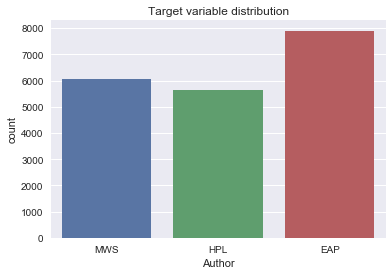

In [ ]:
plt.figure()
sns.countplot(train['author'],)
plt.xlabel('Author')
plt.title('Target variable distribution')
plt.show()

In [ ]:
## Number of words in the text ##
train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train["num_chars"] = train["text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in set(stopwords.words("english"))]))
test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in set(stopwords.words("english"))]))
import string
train["num_punctuations"] =train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [ ]:
train['num_words'].loc[train['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_words', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by author", fontsize=15)
plt.show()

In [ ]:
train['num_punctuations'].loc[train['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_punctuations', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

In [ ]:
#train['num_punctuations'].loc[train['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.barplot(x='author', y='num_punctuations', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='author', y='num_unique_words', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of Unique words in text', fontsize=12)
plt.title("Number of unique by author", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_unique_words', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of Unique words in text', fontsize=12)
plt.title("Number of unique by author", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='author', y='num_chars', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of characters in text', fontsize=12)
plt.title("Number of characters by author", fontsize=15)
plt.show()

In [ ]:

plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_chars', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of characters in text', fontsize=12)
plt.title("Number of characters by author", fontsize=15)
plt.show()

In [ ]:
#train['num_stopwords'].loc[train['num_stopwords']>50] = 50 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_stopwords', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of Stopwords in text', fontsize=12)
plt.title("Number of Stopwords by author", fontsize=15)
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
corpus =[]
count = 19579

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()


